[65.8 65.1 66.5 65.9 69.6 67.6 66.5 64.6 67.8 65.4 67.5 66.1 68.  70.9
 66.4 64.9 67.5 65.5 64.9 64.7 64.  64.5 64.2 68.9 62.7 63.3 63.5 61.7
 61.8 61.1 61.2 60.9 58.7 58.4 56.1 53.8 56.1 57.2 54.8 49.6 51.7 49.
 46.6 48.8 48.1 49.  46.9 46.2 52.9 49.6 52.4 51.  49.1 55.3 55.2 54.9
 55.5 56.6 61.4 58.8 59.8 59.2 60.  64.5 63.4 65.5 64.7 66.4 67.1 65.7
 64.8 66.3 65.1 65.  65.  64.6 65.6 65.2 63.4 65.  64.4 66.7 68.  68.4
 65.5 69.  65.9 66.9 65.8 66.  65.2 64.6 65.8 65.6 66.8 66. ]


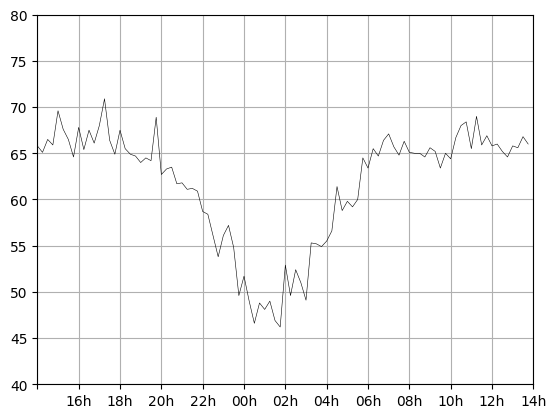

In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import  kurtosis
from scipy import stats, mean



# Given data
data_dir = r"C:\Users\a\Desktop\Road 2 20\PreML\fig_data"
data = pd.read_csv(f"{data_dir}\LAQ.csv")
# data = pd.read_csv("LAQ.csv")
data = data.set_index("time date")
data = data["Laq"]
print(data.dropna().to_numpy())
data.plot(color='black', linewidth=0.4)
plt.ylim(40, 80)
plt.xlim(0, 95)
plt.title('')
plt.xlabel('')
plt.xticks([0,8,16,24,32,40,48,56,64,72,80,88,96],["","16h","18h","20h","22h","00h","02h","04h","06h","08h","10h","12h","14h"])
plt.grid()
plt.savefig('figpoint1Original.svg') 
plt.show()

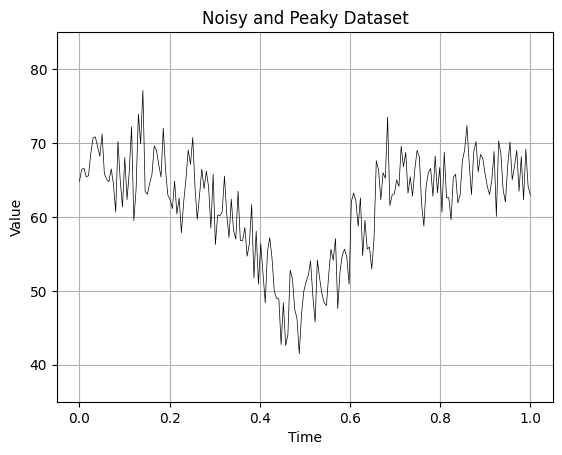

In [9]:
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates


# Number of peaks to add
num_peaks = 0

# Locations and amplitudes of peaks
peak_locations = np.random.choice(len(data), num_peaks, replace=False)
peak_amplitudes = np.random.normal(2, 0.5, num_peaks)  # Adjust the mean and standard deviation as needed

# Add peaks to the data
for i in range(num_peaks):
    data[peak_locations[i]] += peak_amplitudes[i]

# Generate x-values for interpolation
x = np.linspace(0, 1, len(data))

# Perform cubic spline interpolation
cubic_spline = CubicSpline(x, data)

# Number of points to interpolate
num_points = 200

# Interpolate data
interpolated_data = cubic_spline(np.linspace(0, 1, num_points))

# Add noise to interpolated data
mean = 0.2
std_dev = 3
# Adjust the standard deviation as needed
noisy_interpolated_data = interpolated_data + np.random.normal(mean, std_dev, size=num_points)

# Plot noisy interpolated data with peaks
# plt.step(np.linspace(0, 1, num_points), noisy_interpolated_data, where='mid')
# print(noisy_interpolated_data, len(noisy_interpolated_data))

plt.plot(np.linspace(0, 1, num_points), noisy_interpolated_data,color='black', linewidth=0.5)

plt.title('Noisy and Peaky Dataset')
plt.xlabel('Time')
plt.ylabel('Value')

plt.ylim(35, 85)
# plt.xlim(0, 95)

plt.grid(True)

plt.show()



C:\Users\a\AppData\Local\Temp\ipykernel_30040\779967378.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[peak_locations[i]] += peak_amplitudes[i]
C:\Users\a\AppData\Local\Temp\ipykernel_30040\779967378.py:18: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data[peak_locations[i]] += peak_amplitudes[i]


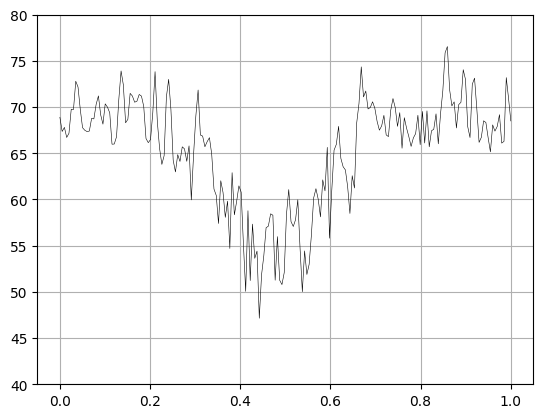

In [12]:
##### import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.dates as mdates


# Number of peaks to add
num_peaks = 30

# Locations and amplitudes of peaks
peak_locations = np.random.choice(len(data), num_peaks, replace=False)
peak_amplitudes = np.abs(np.random.normal(1.5, 0.2, num_peaks))  # Adjust the mean and standard deviation as needed

# Add peaks to the data
for i in range(num_peaks):
    data[peak_locations[i]] += peak_amplitudes[i]

# Generate x-values for interpolation
x = np.linspace(0, 1, len(data))

# Perform cubic spline interpolation
cubic_spline = CubicSpline(x, data)

# Number of points to interpolate
num_points = 200

# Define split points for different noise levels
split_point1 = int(num_points * 0.36)
split_point2 = int(num_points * 0.65)

# Interpolate data
interpolated_data = cubic_spline(np.linspace(0, 1, num_points))

# Apply noise with varying standard deviation
noisy_interpolated_data = np.zeros_like(interpolated_data)
noisy_interpolated_data[:split_point1] = interpolated_data[:split_point1] + np.random.normal(0, 1.2, size=split_point1)  # Low noise in the beginning
noisy_interpolated_data[split_point1:split_point2] = interpolated_data[split_point1:split_point2] + np.random.normal(0.8, 3, size=split_point2 - split_point1)  # High noise in the middle
noisy_interpolated_data[split_point2:] = interpolated_data[split_point2:] + np.random.normal(0, 1.3, size=num_points - split_point2)  # Low noise in the end

# Plot noisy interpolated data with peaks
plt.plot(np.linspace(0, 1, num_points), noisy_interpolated_data, color='black', linewidth=0.4)

plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.ylim(40, 80)
# plt.xlim(0, 1.2)

# plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2],["","16h","18h","20h","22h","00h","02h","04h","06h","08h","10h","12h","14h"])

plt.grid(True)
plt.savefig('figpoint1.svg')
plt.show()


# Saved Points

In [13]:

noisy_interpolated_data

array([68.8957395 , 67.35975241, 67.80274212, 66.71292279, 67.16174964,
       69.75684121, 69.7309345 , 72.79864557, 72.1722195 , 69.74629305,
       67.76739887, 67.48739771, 67.34813144, 67.40631806, 68.77733535,
       68.71924891, 70.29677782, 71.21154748, 69.16178677, 68.15219636,
       70.34969633, 69.98886314, 69.37508736, 65.98213179, 66.00276266,
       66.79130593, 70.82539844, 73.91242882, 72.4040706 , 68.29901027,
       68.6766342 , 71.48513598, 71.19329616, 70.52518773, 70.63600457,
       71.36444375, 71.18631313, 70.07249193, 66.60035257, 66.1499128 ,
       66.48615778, 69.38248688, 73.83911445, 68.43155152, 65.52330219,
       63.79545289, 64.74068381, 71.09034247, 73.00492089, 69.73332862,
       64.23968541, 62.9802236 , 64.8529932 , 64.11224553, 65.70000331,
       65.47517213, 64.12911039, 65.80345572, 59.94912862, 64.84867932,
       69.03200032, 71.85261028, 66.9773866 , 66.86026054, 65.70674911,
       66.2591759 , 66.68907474, 64.90880098, 61.12601584, 60.44

In [3]:
noisy_interpolated_data


array([58.76311232, 60.18567843, 59.81231601, 59.65688088, 58.94397571,
       58.95961462, 58.99687894, 57.97865733, 58.52463637, 58.09027406,
       56.28560033, 56.81217981, 55.83975175, 57.28581045, 56.3683106 ,
       56.90135409, 58.13431218, 58.24277332, 59.21183997, 58.66726302,
       59.96966675, 61.82480201, 63.44770829, 61.74493011, 62.0553667 ,
       62.210016  , 63.24553139, 62.06925831, 61.99476798, 63.09124926,
       61.55718931, 62.87591747, 63.30445714, 61.78327151, 62.8137164 ,
       63.08093479, 63.36799676, 62.22715123, 62.5597071 , 62.4605995 ,
       62.70120769, 64.37915064, 63.53654727, 62.14868894, 62.22387587,
       62.45271725, 63.4529097 , 60.6801609 , 59.33109069, 57.79260921,
       58.52285711, 57.49832914, 57.6402366 , 58.01255329, 58.25702538,
       58.89454117, 60.02398959, 60.83115726, 61.4934824 , 63.07292608,
       62.69275395, 60.25744641, 62.90833289, 62.68123503, 61.20030332,
       61.86757793, 60.07372919, 62.21750295, 60.55497873, 60.88

In [1]:
import csv
from datetime import datetime, timedelta
your_data = [62.43162562, 62.62586009, 63.757236  , 64.29551574, 62.22203985,
       62.19032509, 59.97687574, 61.42189627, 60.84182664, 57.92025683,
       57.62457531, 57.35758204, 57.50073479, 55.030328  , 56.81445951,
       58.21030403, 59.38771295, 57.65792739, 60.57698227, 63.08332698,
       63.67040597, 65.97406671, 63.00618236, 65.57749591, 65.50744409,
       63.82533831, 65.74338151, 63.23679446, 64.36667276, 62.13194606,
       64.06377168, 62.68467946, 63.32551162, 63.41779062, 63.23875455,
       62.83045897, 62.43028926, 62.71996678, 62.80143632, 61.78030746,
       61.48876721, 64.19470633, 62.08913554, 63.08409764, 62.59560648,
       62.44747346, 58.57077144, 58.17742839, 58.85338607, 58.33606755,
       55.92076591, 57.21884412, 56.43924097, 58.37265366, 59.49183511,
       61.77371734, 61.46387219, 63.55819164, 64.89012539, 65.24933039,
       63.26555994, 63.3416031 , 63.65107823, 63.15310863, 61.31051292,
       63.81374387, 62.43895341, 61.18970901, 64.12793466, 62.14903318,
       63.16139495, 62.36028141, 62.3371004 , 62.30960933, 63.69455403,
       60.78484487, 60.4683949 , 62.96159019, 63.56203666, 63.40840565,
       63.40250762, 65.00035231, 63.68479022, 63.2063577 , 62.92022193,
       64.11482458, 63.97740569, 63.24333619, 64.68894623, 64.43096766,
       63.96711999, 63.28788173, 62.22650389, 60.75296445, 61.60269092,
       62.66402506, 60.82711612, 63.43430889, 63.00724537, 61.52225707,
       61.96140996, 63.18983976, 63.42775364, 60.23009617, 60.59911917,
       61.86401464, 61.29836165, 60.79009464, 61.44907626, 62.02304096,
       61.28913567, 61.04530382, 62.19723219, 63.74734743, 63.94595991,
       63.67122673, 64.05573917, 64.43837602, 64.44254759, 63.57831551,
       63.19245407, 61.61963585, 58.49013212, 59.24169804, 56.64314301,
       58.67281581, 55.08075294, 55.83615602, 53.15665086, 54.20511995,
       52.99587027, 52.64347803, 55.27586615, 53.52895853, 55.0983839 ,
       55.66372629, 53.47068195, 53.94826303, 55.95808016, 54.64879976,
       55.44437509, 54.60319244, 54.27665594, 55.2604051 , 55.71882756,
       55.73438412, 54.02444955, 55.44976595, 54.23602257, 56.50019005,
       54.16035769, 56.08589647, 54.87626427, 55.27392394, 52.98581388,
       52.20633784, 53.28986538, 53.81383756, 51.25386937, 51.35305804,
       52.18771083, 50.92823742, 52.90935336, 51.67574066, 54.20520836,
       54.92370498, 53.69919376, 56.41493474, 55.03250611, 55.00360111,
       54.86333799, 53.22014448, 51.78713159, 51.63792258, 51.00219776,
       50.66771799, 48.76650911, 48.82656024, 50.46342608, 50.09327608,
       50.31215802, 50.62020007, 52.02549185, 50.23375583, 51.9155297 ,
       50.34618952, 50.86377706, 51.34490781, 51.33381215, 52.1815864 ,
       51.32158951, 52.42491945, 53.70297917, 53.10112876, 53.08128899,
       52.45747881, 54.50247504, 54.73665644, 54.54268618, 52.79848319,
       53.05508295, 51.05422737, 49.77270447, 50.88650636, 50.72040855,
       52.44658133, 51.62657651, 52.47541846, 52.46130521, 52.20142778,
       52.58238067, 57.49405799, 50.27563911, 60.92953682, 60.80638344,
       59.83220871, 55.8714191 , 55.61381244, 50.8963412 , 50.38730331,
       53.90589017, 55.90559243, 57.54472092, 48.64456719, 46.36425134,
       51.49573838, 46.67413028, 46.06945248, 46.38889559, 47.30147909,
       46.61480246, 44.75661675, 51.11444236, 52.23744401, 51.32899297,
       51.84202426, 48.87219436, 53.51910207, 53.4476785 , 53.18488696,
       48.84334147, 51.34213567, 46.14132937, 47.92337798, 42.01395358,
       53.97606199, 38.84046895, 50.24733488, 43.01170608, 48.12967808,
       48.13800534, 45.5211439 , 53.25149826, 42.73677379, 50.14140584,
       48.4410857 , 54.03439298, 43.85199577, 54.28905899, 53.02587593,
       45.89722011, 49.36828678, 52.40816928, 47.97902823, 53.68221767,
       50.46766273, 46.42773472, 55.88783282, 59.92658409, 45.5130634 ,
       48.9882643 , 49.07607875, 49.4337822 , 47.59361967, 46.86061714,
       45.80674439, 46.77174271, 45.65176674, 47.69249373, 42.23735035,
       41.51706638, 48.29907561, 57.12950945, 48.31624134, 47.72231899,
       49.02373088, 52.43706821, 51.72060417, 56.2589541 , 48.64043659,
       46.1358443 , 57.69375632, 52.2429586 , 54.8927488 , 49.17284872,
       48.06319533, 50.25016539, 48.90354237, 44.83710907, 39.7276004 ,
       47.04571042, 45.3052637 , 56.52390229, 46.12911873, 47.13986726,
       46.26536376, 53.76577067, 44.75585861, 46.11554616, 49.48362953,
       45.71628136, 47.13515049, 50.04768923, 40.62972284, 47.69987196,
       49.65166196, 48.47945663, 50.89197216, 41.9213373 , 39.76462125,
       41.51429569, 45.27364668, 43.33728287, 41.97146401, 44.47977744,
       53.1701723 , 49.15033744, 48.63245584, 45.41829301, 50.76794556,
       52.50170394, 40.06353728, 47.48282473, 46.92606934, 46.20786447,
       39.78783705, 49.42101378, 41.42677603, 46.64645417, 41.17579202,
       49.03428972, 50.55435411, 50.37479654, 42.20119159, 44.65318881,
       46.71766734, 43.09325805, 47.43631145, 46.37825939, 49.10340762,
       50.68297176, 55.71335377, 48.21857194, 53.65594796, 49.36884551,
       52.58156908, 47.58779939, 64.03034808, 52.93601409, 50.69551306,
       48.63867365, 46.96838786, 53.81155109, 42.83219992, 46.8235213 ,
       49.49303855, 44.76019343, 50.80514775, 56.0744199 , 49.53223973,
       51.84826366, 51.930939  , 50.6962973 , 48.84989403, 59.94016995,
       44.6947064 , 50.25508363, 38.48920586, 44.24242192, 47.27838395,
       40.72447891, 49.23491992, 49.87480214, 45.2353968 , 52.02216625,
       49.67931764, 46.13494273, 48.34352997, 48.56249725, 52.16660476,
       43.90328026, 52.19438296, 43.4132276 , 48.32357011, 45.8626686 ,
       50.91302965, 45.35865987, 45.90934364, 43.69321375, 48.73832688,
       47.20184642, 49.20409739, 45.15459304, 50.69441187, 42.8932748 ,
       44.91198812, 43.90951574, 46.40908634, 45.57008148, 48.64237224,
       47.47841318, 46.85769627, 49.05790836, 48.32171272, 42.07337555,
       43.7890015 , 40.7372069 , 51.67775298, 47.32925593, 53.15306566,
       43.88189566, 48.03407527, 51.35917549, 46.87598218, 48.32909985,
       45.50133033, 46.29215152, 44.58662153, 45.9238768 , 48.68680302,
       42.64990545, 48.12550162, 48.03254901, 55.49840022, 47.02495474,
       47.81135926, 47.93088585, 51.81963486, 56.02814745, 46.2531112 ,
       45.82789834, 49.91918619, 55.50697537, 44.39412776, 45.92798667,
       48.1121274 , 50.40324943, 50.9492    , 49.8350167 , 43.9194522 ,
       49.4201907 , 47.02149933, 49.54737791, 41.25364965, 47.26852313,
       42.64942508, 48.95728106, 50.71974288, 49.38080936, 50.17196277,
       48.98843082, 42.2367335 , 50.31611818, 41.51904615, 53.60258886,
       55.58988302, 45.88284839, 46.49728126, 51.24418318, 54.49296994,
       52.5163825 , 60.41515911, 55.45448907, 59.39414732, 56.39861899,
       65.32350002, 56.78821848, 57.1588821 , 51.29232729, 58.48923844,
       54.6887148 , 55.44712411, 51.76312565, 54.48958696, 57.41116412,
       52.55032018, 56.19154107, 54.03743353, 59.77903254, 55.44889508,
       55.63014699, 56.06731622, 57.14570076, 57.33314467, 57.37990255,
       57.95983463, 59.28294329, 58.57550388, 57.89841235, 58.97818871,
       57.0219534 , 58.5174314 , 57.72076425, 58.78683041, 59.50953791,
       59.08492966, 61.59772053, 61.04907377, 62.64461138, 60.1773598 ,
       62.96908619, 63.69757181, 61.59114967, 63.06927709, 60.30325546,
       61.0511542 , 60.68202478, 61.90775869, 59.87414685, 61.120906  ,
       61.67787183, 62.21918929, 61.86189977, 61.84737822, 60.45986093,
       61.27467306, 61.73395692, 60.80104448, 58.71997708, 58.33209594,
       57.49736647, 56.5362024 , 57.83867127, 55.07034416, 55.56711273,
       58.42146328, 56.56729271, 57.49054621, 57.94151947, 56.6813695 ,
       58.68115244, 57.50475397, 57.51548875, 61.00386967, 59.45603466,
       57.94373156, 57.02640627, 57.53119497, 56.69279308, 56.96288152,
       57.73573718, 58.82830963, 60.02306422, 59.39563485, 59.93088885,
       58.77978404, 59.55272539, 61.03308943, 60.72887535, 61.44601908,
       61.27936926, 60.89210573, 57.78361428, 59.15481302, 55.82689221,
       55.93170147, 56.30130527, 53.81494855, 54.02818874, 54.17228902,
       56.15080875, 56.48951762, 57.79324672, 59.42551881, 59.91382884,
       59.65993912, 59.08432297, 59.36564902, 59.9089073 , 58.40208184,
       57.34244204, 58.36399036, 58.69107664, 58.1021965 , 57.96057999,
       60.50588647, 58.91696334, 58.46221476, 60.0404682 , 59.66499526,
       60.66895188, 62.07953072, 62.54262292, 63.61648162, 62.28758284,
       64.32193417, 63.63722835, 63.28004583, 62.66911449, 63.01039714,
       60.89704383, 64.19961515, 65.44183378, 62.93342093, 61.65847727,
       63.54395172, 64.14458112, 62.9045169 , 63.85720759, 61.54734301,
       60.64079623, 60.17255897, 61.77862775, 62.08228344, 61.74818056,
       61.89457142, 62.99535956, 64.04844883, 63.20534757, 64.02523169,
       64.54067076, 66.18025821, 65.04226112, 63.804256  , 63.55439476,
       62.87583344, 61.97303362, 62.62841419, 63.89825374, 62.85000556,
       63.41564396, 62.95293895, 62.65861434, 60.45254236, 60.67078096,
       60.86621595, 59.5661902 , 58.35685891, 58.9644596 , 57.59453835,
       57.02484064, 56.72256832, 60.48000167, 59.40214049, 61.80437475,
       62.70023613, 65.68618889, 64.5114052 , 66.1134858 , 66.15920794,
       66.73470674, 67.47657043, 66.14306759, 65.42564839, 63.84125877,
       64.52592307, 61.70856153, 60.88402409, 57.55117335, 57.01164958,
       57.30135406, 56.97945677, 57.66327246, 56.35952904, 55.92102569,
       57.07679913, 59.54995207, 59.51597542, 60.01697346, 62.46347984,
       62.01182602, 61.56023447, 63.30910741, 61.5250949 , 62.40220556,
       61.87593489, 60.66138892, 59.87642767, 60.39428249, 60.97823942,
       61.87756135, 60.64777011, 63.00635211, 63.65946312, 62.28300739,
       63.0284185 , 64.20038332, 64.46507776, 63.97452935, 63.06204522,
       62.58171817, 61.29047846, 61.40096207, 59.84056623, 60.23483735,
       55.97399902, 54.26294177, 53.37180114, 49.7525527 , 48.60029961]
# Define start and end date/time
start_date = datetime(year=2008, month=11, day=11, hour=15, minute=0)
end_date = datetime(year=2008, month=12, day=11, hour=14, minute=45)

# Define number of data points
num_data_points = 700

# Calculate time delta between each data point
time_delta = (end_date - start_date) / (num_data_points - 1)

# Open the CSV file in append mode (a+)
with open("data.csv", "a+") as csvfile:
  # Create a CSV writer object
  writer = csv.writer(csvfile)

  # Check if the file is empty, write header if needed
  if csvfile.tell() == 0:
    writer.writerow(["Timestamp", "Data"])

  # Iterate through data points and write to CSV
  for i in range(num_data_points):
    timestamp = start_date + (time_delta * i)
    writer.writerow([timestamp.strftime("%Y-%m-%d %H:%M:%S"), your_data[i]])  # Replace 'your_data[i]' with your actual data


In [7]:
Label = "Data"

el_var = data

krts = kurtosis(el_var)
std_dev = stats.tstd(el_var)
rms2 = np.mean(el_var)
minv2 = el_var.min()
maxv2= el_var.max()

Label2 = "Data"

el_var2 = noisy_interpolated_data

krts2 = kurtosis(el_var2)
std_dev2 = stats.tstd(el_var2)



print("kurtosis : real = ", krts, " / Eq = ",krts2, " / Difference = ",np.abs( krts - krts2)  )
print("std : real = ", std_dev, " Eq = ",std_dev2)
print(rms2,minv2,maxv2)



kurtosis : real =  -0.42862015923690544  / Eq =  1.2281819688251696  / Difference =  1.656802128062075
std : real =  6.441676116469963  Eq =  6.905007745328501
63.04936298750178 48.22281646944647 73.61876823739928
